## Data Augmentation with CIFAR-10

Import libs

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, SpatialDropout2D, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Same model building as other CIFAR-10

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# Convert to float32 for scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data by scaling by max
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encode target labels and reshape
y_train = np_utils.to_categorical(y_train.transpose()).reshape(50000,10)
y_test = np_utils.to_categorical(y_test.transpose()).reshape(10000,10)
input_shape = (32,32,3)

print(f"Training set: {len(X_train)}\nTesting set: {len(X_test)}")

def build_cnn3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, summarize=False, dropout=False, drop_prob1=0.2, drop_prob2=0.2):
  model = Sequential()
  
  if regularizer == None:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob2))

    # model.add(Conv2D(filters=256, kernel_size=kernel_size, activation=activation))
    # model.add(BatchNormalization())
    # if dropout:
    #   model.add(SpatialDropout2D(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','accuracy'])
    
    if summarize:
      model.build()
      model.summary()
    return model
  else:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation, input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob1))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(SpatialDropout2D(drop_prob2))

    # model.add(Conv2D(filters=256, kernel_size=kernel_size, activation=activation))
    # model.add(BatchNormalization())
    # if dropout:
    #   model.add(SpatialDropout2D(drop_prob2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation=activation, kernel_regularizer=regularizer(lam)))
    if dropout:
      model.add(Dropout(drop_prob2))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','accuracy'])

    if summarize:
      model.build()
      model.summary()
    return model

# Helper functions
def show_acc(history, e):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy/MAE')
  plt.legend()
  plt.show()
  
def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

170498071/170498071 [==============================] - 3s 0us/step
Training set: 50000
Testing set: 10000


## Data Augmentation

Normal

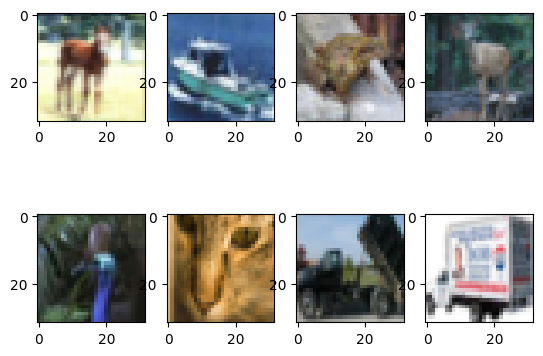

2023-05-03 22:03:34.874440: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/spatial_dropout2d/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


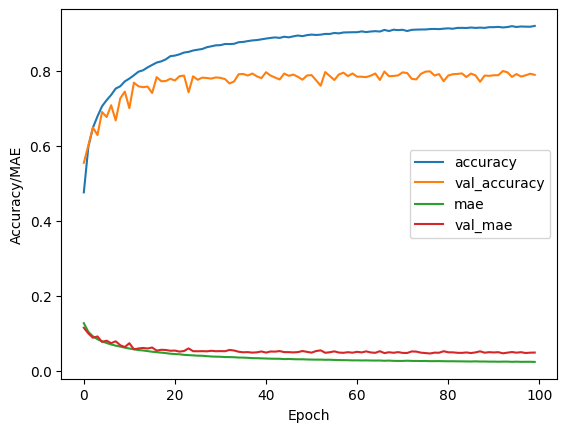

Max accuracy:  0.9189800024032593
Min accuracy:  0.47547999024391174
313/313 [==============================] - 1s 4ms/step - loss: 0.8777 - mae: 0.0488 - accuracy: 0.7887
Test performance  [0.8777197003364563, 0.04876670986413956, 0.7886999845504761]


(<keras.engine.sequential.Sequential at 0x758767e576a0>,
 <keras.callbacks.History at 0x75870625f100>)

In [3]:
dataaug = ImageDataGenerator()
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)


Rotating Images

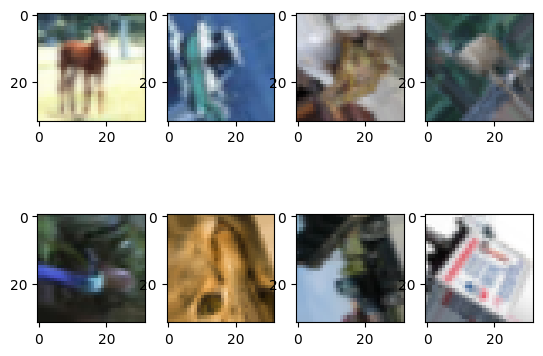

2023-05-03 22:24:13.419766: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/spatial_dropout2d_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


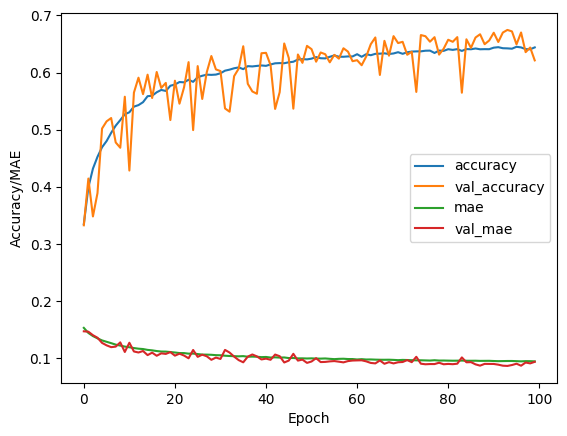

Max accuracy:  0.6450999975204468
Min accuracy:  0.3348599970340729
313/313 [==============================] - 1s 4ms/step - loss: 1.2188 - mae: 0.0938 - accuracy: 0.6213
Test performance  [1.2188317775726318, 0.09377649426460266, 0.6212999820709229]


(<keras.engine.sequential.Sequential at 0x7586f4650340>,
 <keras.callbacks.History at 0x7586f41781f0>)

In [4]:
dataaug = ImageDataGenerator(rotation_range=540)
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)

Flip horizontally

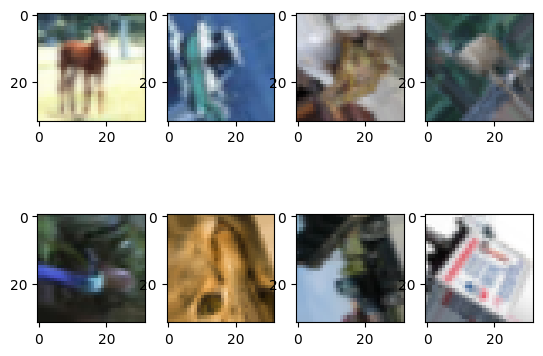

2023-05-03 23:16:22.825331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/spatial_dropout2d_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


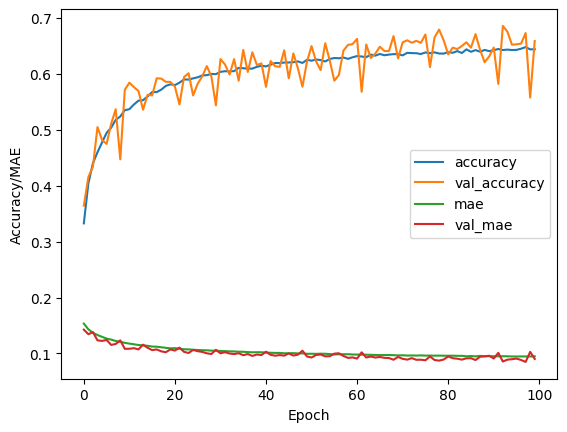

Max accuracy:  0.6480000019073486
Min accuracy:  0.332720011472702
313/313 [==============================] - 1s 4ms/step - loss: 1.0833 - mae: 0.0902 - accuracy: 0.6589
Test performance  [1.0833349227905273, 0.0901964083313942, 0.6589000225067139]


(<keras.engine.sequential.Sequential at 0x758767e57670>,
 <keras.callbacks.History at 0x7586f54d3460>)

In [5]:
dataaug = ImageDataGenerator(horizontal_flip=True)
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)

Add random noise

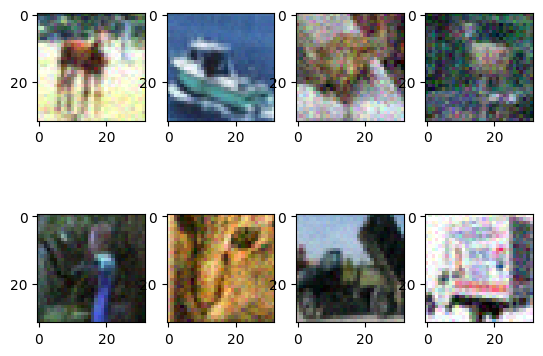

2023-05-04 00:10:03.143407: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/spatial_dropout2d_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


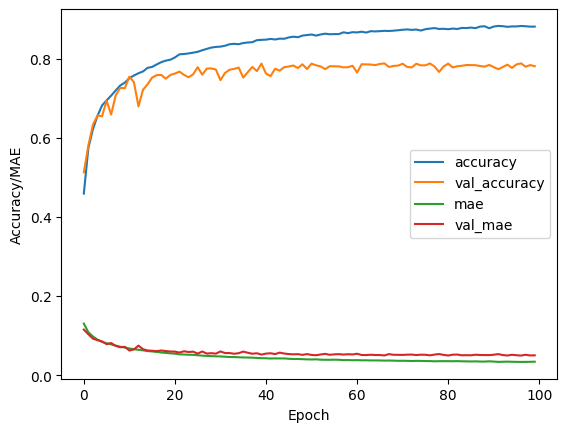

Max accuracy:  0.8833000063896179
Min accuracy:  0.45923998951911926
313/313 [==============================] - 1s 4ms/step - loss: 0.9021 - mae: 0.0502 - accuracy: 0.7814
Test performance  [0.9020760655403137, 0.05017988756299019, 0.7814000248908997]


(<keras.engine.sequential.Sequential at 0x7586f468bdf0>,
 <keras.callbacks.History at 0x7586f43081f0>)

In [6]:
def noise(img):
    deviation = 0.08*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

dataaug = ImageDataGenerator(preprocessing_function=noise)
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)

Apply filter

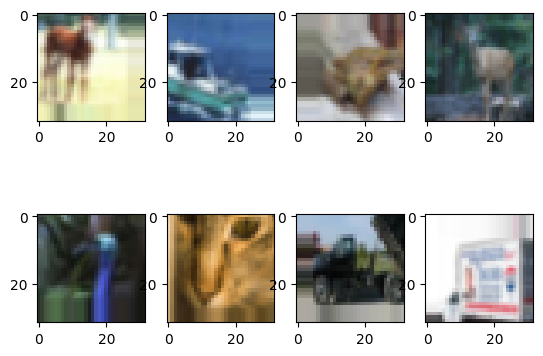

2023-05-04 00:46:28.982243: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/spatial_dropout2d_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


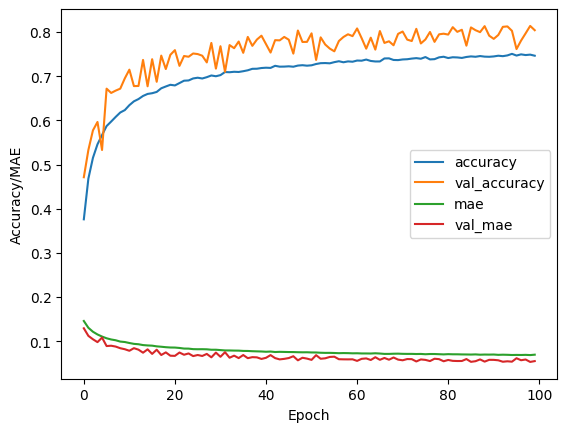

Max accuracy:  0.7504799962043762
Min accuracy:  0.375900000333786
313/313 [==============================] - 1s 4ms/step - loss: 0.7052 - mae: 0.0550 - accuracy: 0.8040
Test performance  [0.7052294611930847, 0.05499689280986786, 0.8040000200271606]


(<keras.engine.sequential.Sequential at 0x7586ff0c7fd0>,
 <keras.callbacks.History at 0x7586e8db2050>)

In [7]:
dataaug = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
dataaug.fit(X_train)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)

Zoom

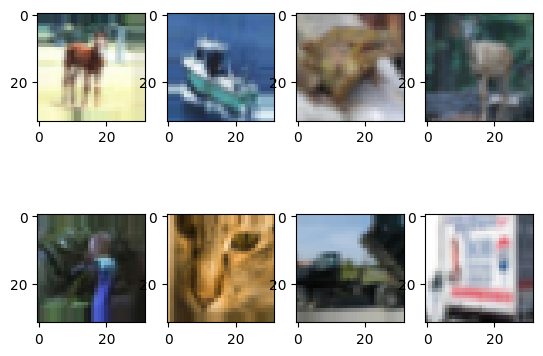

2023-05-04 01:41:34.028038: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/spatial_dropout2d_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


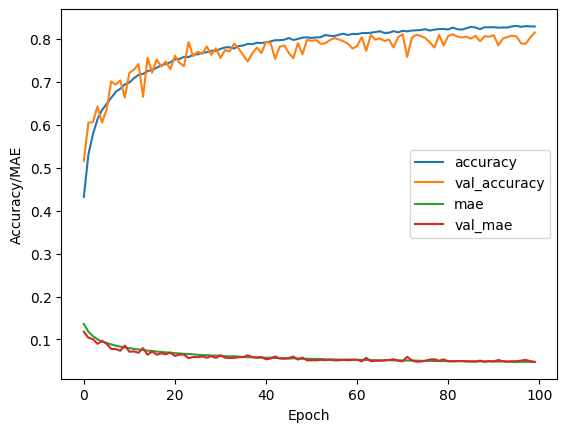

Max accuracy:  0.8304600119590759
Min accuracy:  0.43187999725341797
313/313 [==============================] - 1s 4ms/step - loss: 0.7115 - mae: 0.0476 - accuracy: 0.8151
Test performance  [0.7114885449409485, 0.04763684421777725, 0.8151000142097473]


(<keras.engine.sequential.Sequential at 0x7586e8180250>,
 <keras.callbacks.History at 0x7586e8880c70>)

In [8]:
dataaug = ImageDataGenerator(zoom_range=0.3)
dataaug.fit(X_train, augment=True)

sample  = dataaug.flow(X_train, y_train, batch_size=8, seed=100)  
X_batch, y_batch = next(sample)

fig, axs = plt.subplots(2, 4)

axs[0,0].imshow(X_batch[0])
axs[0,1].imshow(X_batch[1])
axs[0,2].imshow(X_batch[2])
axs[0,3].imshow(X_batch[3])
axs[1,0].imshow(X_batch[4])
axs[1,1].imshow(X_batch[5])
axs[1,2].imshow(X_batch[6])
axs[1,3].imshow(X_batch[7])

plt.show()

def build_and_plot3(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob1=0.2, drop_prob2=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn3(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob1=drop_prob1, drop_prob2=drop_prob2, summarize=summarize)
  history = model.fit(dataaug.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

build_and_plot3(regularizer=l2, lam=0.00001, dropout=True, drop_prob1=0.2, drop_prob2=0.2, e=100)